### Hypothesis Testing in Python

In this example, we test our sample data on the average height of people in the UK.

You import the data set, perform basic EDA and conduct a hypothesis test of a mean to investigate whether the true population estimate is significantly different from 165cm and 166cm.  

In [ ]:
# upload the csv file and create a dataframe

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt 
import scipy.stats as st
import seaborn as sns

df = pd.read_csv('height.csv')

In [ ]:
df.head()

,ID,Height
0,1000,187.849361
1,1004,171.398172
2,1008,172.183314
3,1011,142.268503
4,1016,174.386182


Perform some basic EDA
* Descriptive Statistics
* Visualisations

In [ ]:
print('Sample Mean: ', df['Height'].mean())
print('Sample Std: ', df['Height'].std())

Sample Mean:  165.2708312773001
Sample Std:  9.748050193802774


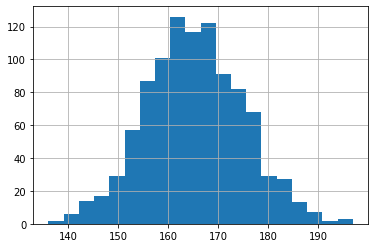

In [ ]:
df['Height'].hist(bins=20)

We can see our data looks normally ditributed - this is important as the distribution determines the statistical test we will use.

We can run a Shapiro-Wilk test to determine the probabiity our sample is normally distributed.

The p-value is the probability of the sample being normally distributed, as long as this is greater than our level of significance, we can assume our sample is normally distributed.  

In [ ]:
from scipy.stats import shapiro

sl = 0.05 # significance level = (1 - required confidence level)

stat, p = shapiro(df['Height'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > sl:
	print('The sample is p=%.3f normally distributed' % (p))
else:
	print('Probably not not normally distributed')

stat=0.999, p=0.852
The sample is p=0.852 normally distributed


We can now declare a null and alternative hypothesis.  

Suppose we want to test our estimate that true population average height is 165cm

* Null: Average Height of population is NOT different from 165cm
* Alt: Average Height of population is different from 165cm

The question is, do we have enough evidence to REJECT the null hypothesis?

That depends on how much data we have, how spread out that data is, how far the mean of our sample is away from 165cm and how confident we want to be that true population mean falls within our sample.  

We work out the z-score = (Mean of Sample - Hypothesized Mean) / Std Error

Std Error = Sample Std Dev / Sqrt(number of observations)

Once we have the z-Score we can calculate the p-Value.

The p-Value is the probability the observation we see in our data (Mean = 164.86) came about as a result of random chance.  So if this is less than our level of significance (say 0.05 or 5%), we can be 95% sure the real, true population mean is represented by our sample.  

We say our sample mean is statistically significant if p-value < level of significance.

Confidence Interval	 - Level of Significance	- Critical Z-Score
* 75%	- 25% -	1.15
* 90%	- 10% -	1.64
* 95%	- 5% - 1.96
* 99%	- 1% -	2.57


In [ ]:
# Hypothesis Test One

hypothesized_mean = 165
n = 1000   # number of samples
sl = 0.05

sample_mean = df['Height'].mean()
sample_std = df['Height'].std()
SE = sample_std/np.sqrt(n)
Z_Score = (sample_mean - hypothesized_mean) / SE
critical_z = st.norm.ppf(1-sl/2)
ci = st.norm.cdf(critical_z)
p_value = scipy.stats.norm.sf(abs(Z_Score))*2

print('Standard Error:', SE)
print('Z-Score:', Z_Score)
print('Critical Z:', critical_z)
print('Confidence Interval:', 1-sl)
print('p-value:', p_value)
print()
if p_value > sl:
  print('Not enough evidence to reject null')
else:
  print('Reject the null')
  print('The true population estimate is significantly different from', sample_mean, 'at the', 1-sl, 'level' )
print()
print('68% confidence interval:', sample_mean - (1.0 * SE), " - ", sample_mean + (1.0 * SE))
print('75% confidence interval:', sample_mean - (1.15 * SE), " - ", sample_mean + (1.15 * SE))
print('95% confidence interval:', sample_mean - (1.96 * SE), " - ", sample_mean + (1.96 * SE))
print('99% confidence interval:', sample_mean - (2.57 * SE), " - ", sample_mean + (2.57 * SE))

Standard Error: 0.30826041358062556
Z-Score: 0.8785794911329211
Critical Z: 1.959963984540054
Confidence Interval: 0.95
p-value: 0.3796293198165177

Not enough evidence to reject null

68% confidence interval: 164.96257086371946  -  165.57909169088072
75% confidence interval: 164.91633180168236  -  165.62533075291782
95% confidence interval: 164.66664086668206  -  165.87502168791812
99% confidence interval: 164.4786020143979  -  166.0630605402023


In other words, the data supports the hypothesis that the population mean estimate is 165cm but does not support the hypothesis that the population mean estimate is 166cm.  

If your population estimate falls within the confidence interval, your sample provides enough evidence it is statitistically representative of the true population estimate.  

Change the number of sample sizes and change the significance level - sl to 0.1

Notice what happens when the p_value < sl !  Your hypothesized mean falls outside of the bounds of the confidence interval - and your sample is no longer representative - you don't have enough evidence!

In [ ]:
# Hypothesis Test Two

hypothesized_mean = 167
n = 200   # number of samples
sl = 0.05

sample_mean = df['Height'].mean()
sample_std = df['Height'].std()
SE = sample_std/np.sqrt(n)
Z_Score = (sample_mean - hypothesized_mean) / SE
critical_z = st.norm.ppf(1-sl/2)
ci = st.norm.cdf(critical_z)
p_value = scipy.stats.norm.sf(abs(Z_Score))*2

print('Standard Error:', SE)
print('Z-Score:', Z_Score)
print('Critical Z:', critical_z)
print('Confidence Interval:', 1-sl)
print('p-value:', p_value)
print()
if p_value > sl:
  print('Not enough evidence to reject null')
else:
  print('Reject the null')
  print('The true population estimate is significantly different from', sample_mean, 'at the', (1-sl), 'level' )
print()
print('68% confidence interval:', sample_mean - (1.0 * SE), " - ", sample_mean + (1.0 * SE))
print('75% confidence interval:', sample_mean - (1.15 * SE), " - ", sample_mean + (1.15 * SE))
print('95% confidence interval:', sample_mean - (1.96 * SE), " - ", sample_mean + (1.96 * SE))
print('99% confidence interval:', sample_mean - (2.57 * SE), " - ", sample_mean + (2.57 * SE))

Standard Error: 0.689291239538478
Z-Score: -2.5086184525683115
Critical Z: 1.959963984540054
Confidence Interval: 0.95
p-value: 0.012120432333273009

Reject the null
The true population estimate is significantly different from 165.2708312773001 at the 0.95 level

68% confidence interval: 164.5815400377616  -  165.96012251683857
75% confidence interval: 164.47814635183084  -  166.06351620276934
95% confidence interval: 163.91982044780468  -  166.6218421067955
99% confidence interval: 163.4993527916862  -  167.042309762914


### Bootstrap Resample Hypothesis Test

The following code is an example of a resampling exercise using a popular technique called bootstrap resampling.   This is code is optional for the week's topic but useful to know for later modelling techniques.  

In [ ]:
data = df['Height']
data = np.array(data)
print('Population Mean:', data.mean())
print('Population Std Dev:', data.std())

Population Mean: 165.2708312773
Population Std Dev: 9.743174949589962


We can now resample our data - selecting n random samples of 30 observations each from our original dataset of 1000 observations, we will then use those to create a sampling distribution.  

In [ ]:
n = 100000

sample_means = []

for i in range(n):
  sample = np.random.choice(data, size=30)
  sample_means.append(sample.mean()) 

sample_means = np.array(sample_means)
print('Sampling Dist. Mean:', sample_means.mean())
print('Sampling Dist. Std Dev:', sample_means.std())

Sampling Dist. Mean: 165.26837248362918
Sampling Dist. Std Dev: 1.7733386076417104


In [ ]:
hypothesized_mean = 169

counts = np.count_nonzero(sample_means > hypothesized_mean) 
p_value = counts / len(sample_means)

print('There are', len(sample_means), 'random samples in the sampling distribution')
print('There are', counts, 'instances where the random sample mean is greater than our hypothesized mean of', hypothesized_mean )
print('The p_value of', p_value, 'is the probability that true population average height is not different from', hypothesized_mean)


There are 100000 random samples in the sampling distribution
There are 1807 instances where the random sample mean is greater than our hypothesized mean of 169
The p_value of 0.01807 is the probability that true population average height is not different from 169


Try changing the number of random samples selected - n - in the cell above and notice what happens to the histogram and the sampling distribution mean.  

Then change the hypothesized mean and notice how the probability of the hypothesized mean occuring based on the evidence.

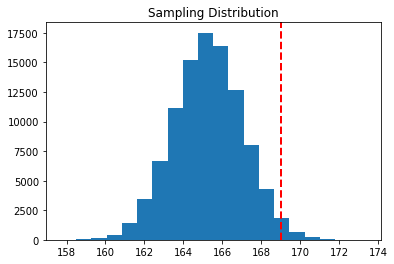

In [ ]:
plt.hist(sample_means, bins=20)
plt.title('Sampling Distribution')
plt.axvline(hypothesized_mean, color='red', linestyle='dashed', linewidth=2);